In [29]:
%matplotlib notebook

In [30]:
import obspy
import obspy.taup
from obspy.taup.tau_model import TauModel
from obspy.taup.taup_create import build_taup_model
from obspy.taup import TauPyModel
from obspy.taup.taup_time import TauPTime
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [31]:
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

In [39]:
def distplot(model_name, source_depth):
    
    event_dict = {'S0173a': 173.8, '173ab': 173.6, 'S0235b': 167, 'S0325a SE': 231.3, 'S0325a NE': 230.7, 'S0325ab': 231.7}
#     event_dict = {'1sd': 170, 'value':174, '-1sd': 178}
    model = TauPyModel(model = model_name)

    p_ls = []; s_ls = []
    dist_ls = [];diff_ls = []
    
    for dist in np.arange(15, 50, 0.1):
        arrivals = model.get_ray_paths(phase_list=["P", "S"], source_depth_in_km=source_depth,
                                   distance_in_degree=dist)
        try:
            p_arrival = arrivals[0].time
            p_ls.append(p_arrival)
            s_arrival = arrivals[1].time
            s_ls.append(s_arrival)
            dist_ls.append(dist)
            
        except:
            pass
            
        diff = [s - p for s, p in zip(s_ls, p_ls)]
#         diff_ls.append(diff)
        
#     dict_tt = {'distance':dist_ls, 'P time': p_ls, 'S time': s_ls, 'difference':diff_ls}
#     tt = pd.DataFrame.from_dict(dict_tt)
#     pd.set_option('display.max_rows', None)
#     print(tt)
        
        
    plt.title(model_name)
    plt.scatter(dist_ls, diff, s=0.1, c='k')
    plt.xlabel('Distance (degrees)')
    plt.ylabel('S-P Arrival (seconds)')
    
    ymin=0;ymax=300
    for key, value in event_dict.items():
        diff_index, actual_diff = min(enumerate(diff), key=lambda x: abs(x[1]-value))
        actual_dist = truncate(dist_ls[diff_index],1)
        print('diff index values:', diff_index, actual_diff)
        print('distance of ' + key + ':', dist_ls[diff_index])
        plt.vlines(dist_ls[diff_index], ymin, ymax, color='c')
        plt.text(dist_ls[diff_index]-1, 0, (key, actual_dist),rotation=90)

#     plt.show()
    return diff, dist_ls

In [14]:
def distplot_multimod(model_name, source_depth):
    
    event_dict = {'S0173a': 174, 'S0235b': 166.6, 'S0325a': 232}
#     event_dict = {'1sd': 174.7, 'value': 174, '-1sd': 173.3}
    model = TauPyModel(model = model_name)

    p_ls = []; s_ls = []
    dist_ls = []
    
    for dist in np.arange(15, 50, 0.1):
        arrivals = model.get_ray_paths(phase_list=["P", "S"], source_depth_in_km=source_depth,
                                   distance_in_degree=dist)
        try:
            p_arrival = arrivals[0].time
            p_ls.append(p_arrival)
            s_arrival = arrivals[1].time
            s_ls.append(s_arrival)
            dist_ls.append(dist)
            
        except:
            pass
            
        diff = [s - p for s, p in zip(s_ls, p_ls)]
        
        
    plt.title(model_name)
    plt.plot(dist_ls, diff, c=colors[n])
    plt.xlabel('Distance (degrees)')
    plt.ylabel('S-P Arrival (seconds)')
    
    ymin=0;ymax=300
    for key, value in event_dict.items():
        diff_index, actual_diff = min(enumerate(diff), key=lambda x: abs(x[1]-value))
        actual_dist = truncate(dist_ls[diff_index],1)
        print('distance of ' + key + ' in ' + model_name + '@' + str(depth) + ' :', dist_ls[diff_index])
        plt.vlines(dist_ls[diff_index], ymin, ymax, color=colors[n])
        
#     plt.show()
    return diff, dist_ls

In [ ]:
diff, dist_ls = distplot("Gudkova", 25)

<IPython.core.display.Javascript object>


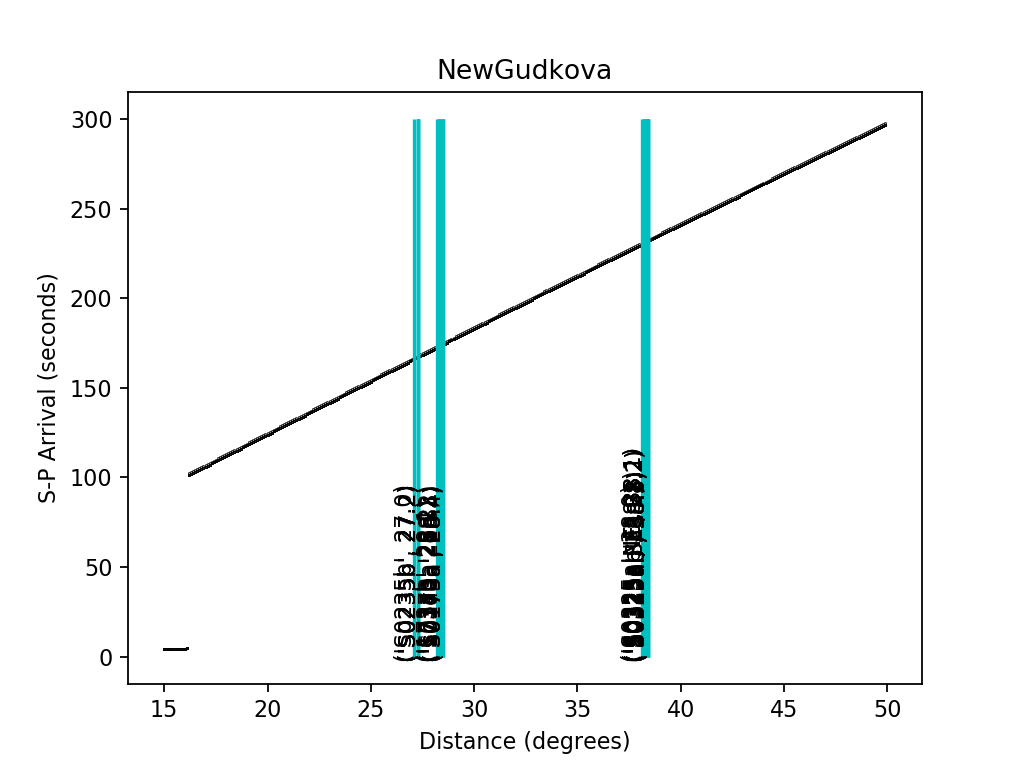

diff index values: 133 173.956277344
distance of S0173a: 28.3
diff index values: 132 173.368672844
distance of 173ab: 28.2
diff index values: 121 166.897992888
distance of S0235b: 27.1
diff index values: 231 230.945513163
distance of S0325a: 38.1
diff index values: 232 231.520194614
distance of S0325ab: 38.2


In [33]:
diff, dist_ls = distplot("Gudkova", 35)

In [ ]:
diff, dist_ls = distplot("Gudkova", 45)

In [ ]:
diff, dist_ls = distplot("Gudkova", 55)

In [7]:
diff, dist_ls = distplot("NewGudkova", 25)

diff index values: 134 173.968642677
distance of S0173a: 28.4
diff index values: 122 166.906108934
distance of S0235b: 27.2
diff index values: 234 232.148259784
distance of S0325a: 38.4
diff index values: 293 265.775476279
distance of S0183a: 44.3


In [40]:
diff, dist_ls = distplot("NewGudkova", 35)

diff index values: 134 173.537895341
distance of S0173a: 28.4
diff index values: 134 173.537895341
distance of 173ab: 28.4
diff index values: 123 167.069459199
distance of S0235b: 27.3
diff index values: 233 231.089461842
distance of S0325a SE: 38.3
diff index values: 232 230.514923181
distance of S0325a NE: 38.2
diff index values: 234 231.663851706
distance of S0325ab: 38.4


diff index values: 137 174.865534225
distance of 1sd: 28.7
diff index values: 136 174.278816329
distance of value: 28.6
diff index values: 134 173.10505134
distance of -1sd: 28.4


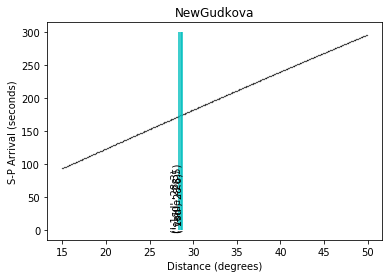

In [16]:
diff, dist_ls = distplot("NewGudkova", 45)

diff index values: 137 174.528474094
distance of 1sd: 28.7
diff index values: 136 173.942463701
distance of value: 28.6
diff index values: 135 173.35634249
distance of -1sd: 28.5


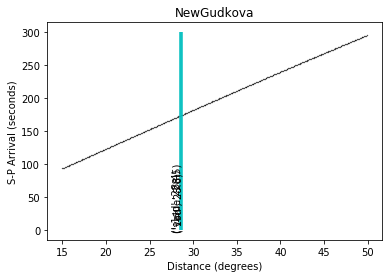

In [17]:
diff, dist_ls = distplot("NewGudkova", 55)

In [ ]:
diff, dist_ls = distplot("Combined", 25)

<IPython.core.display.Javascript object>


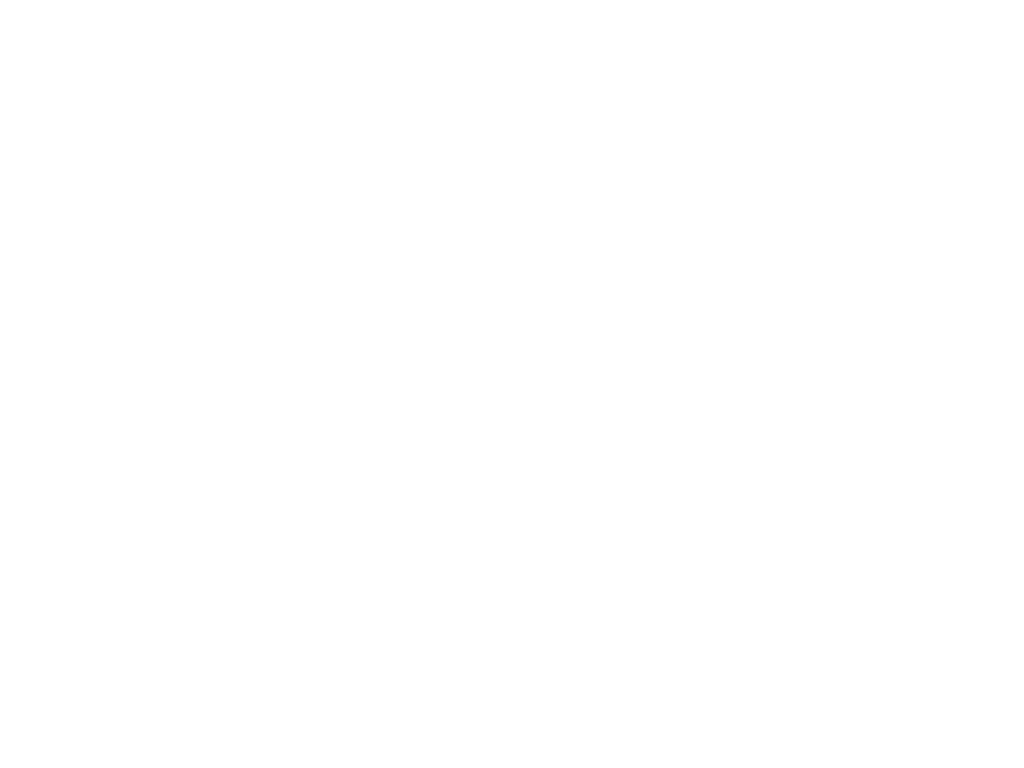

diff index values: 132 173.941824494
distance of S0173a: 28.2
diff index values: 120 166.888364546
distance of S0235b: 27.0
diff index values: 232 232.037128829
distance of S0325a: 38.2
diff index values: 292 266.173811105
distance of S0183a: 44.2


In [9]:
diff, dist_ls = distplot("Combined", 35)

In [ ]:
diff, dist_ls = distplot("Combined", 45)

In [ ]:
diff, dist_ls = distplot("Combined", 55)

<IPython.core.display.Javascript object>


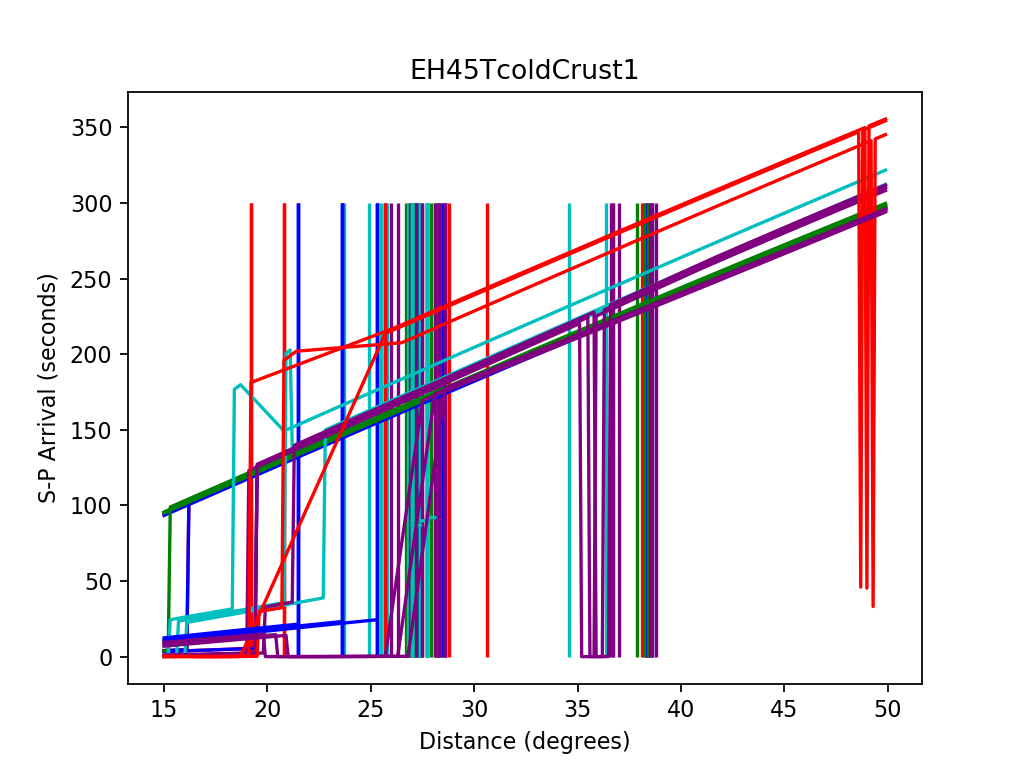

distance of S0173a in Gudkova@15 : 28.2
distance of S0235b in Gudkova@15 : 26.9
distance of S0325a in Gudkova@15 : 38.1
distance of S0173a in Gudkova@35 : 28.3
distance of S0235b in Gudkova@35 : 27.0
distance of S0325a in Gudkova@35 : 38.3
distance of S0173a in Gudkova@55 : 28.4
distance of S0235b in Gudkova@55 : 27.2
distance of S0325a in Gudkova@55 : 38.4
distance of S0173a in NewGudkova@15 : 28.3
distance of S0235b in NewGudkova@15 : 27.1
distance of S0325a in NewGudkova@15 : 38.3
distance of S0173a in NewGudkova@35 : 28.5
distance of S0235b in NewGudkova@35 : 27.2
distance of S0325a in NewGudkova@35 : 38.5
distance of S0173a in NewGudkova@55 : 28.6
distance of S0235b in NewGudkova@55 : 27.3
distance of S0325a in NewGudkova@55 : 38.6
distance of S0173a in Combined@15 : 27.9
distance of S0235b in Combined@15 : 26.7
distance of S0325a in Combined@15 : 37.9
distance of S0173a in Combined@35 : 28.2
distance of S0235b in Combined@35 : 27.0
distance of S0325a in Combined@35 : 38.2
distanc

In [15]:
%matplotlib notebook

colors = ['r','b','g','c','purple']

n=0
for mod in ['Gudkova','NewGudkova','Combined','TAYAK','MAAK']:
    for depth in [15,35,55]:
        diff, dist_ls = distplot_multimod(mod, depth)
    n += 1

<IPython.core.display.Javascript object>


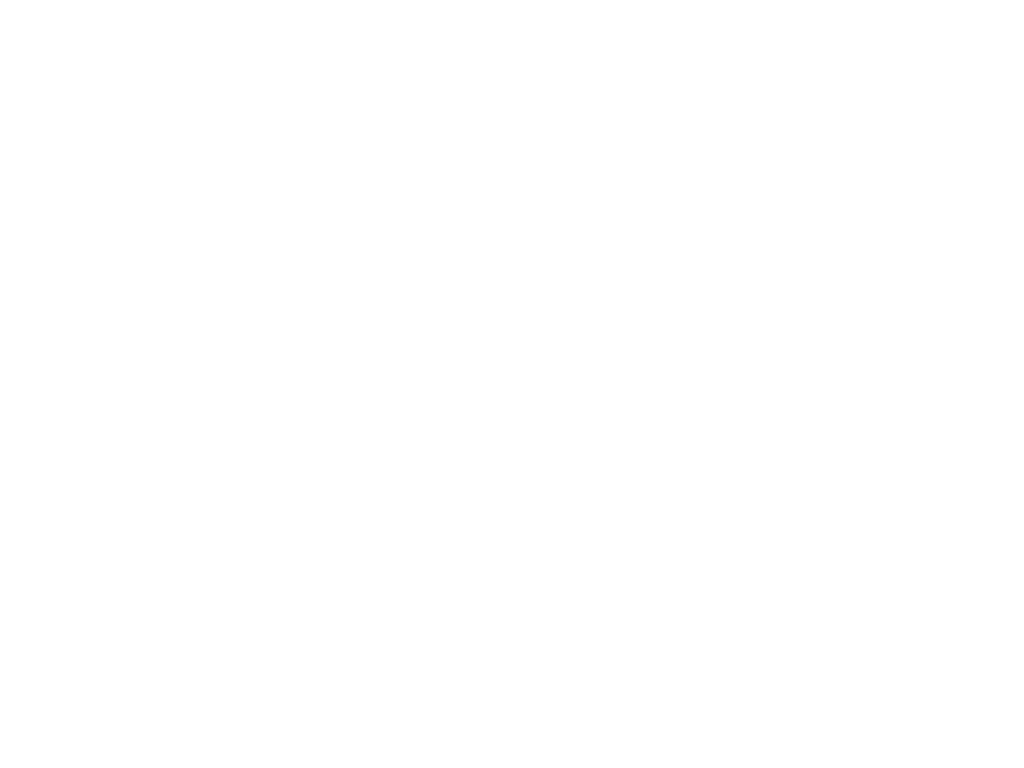

distance of S0173a in DWAK@15 : 20.8
distance of S0235b in DWAK@15 : 20.8
distance of S0325a in DWAK@15 : 30.6
distance of S0173a in DWAK@35 : 19.2
distance of S0235b in DWAK@35 : 19.2
distance of S0325a in DWAK@35 : 28.6
distance of S0173a in DWAK@55 : 25.7
distance of S0235b in DWAK@55 : 25.7
distance of S0325a in DWAK@55 : 28.8
distance of S0173a in DWThot@15 : 25.3
distance of S0235b in DWThot@15 : 25.3
distance of S0325a in DWThot@15 : 25.3
distance of S0173a in DWThot@35 : 23.6
distance of S0235b in DWThot@35 : 23.6
distance of S0325a in DWThot@35 : 23.6
distance of S0173a in DWThot@55 : 21.5
distance of S0235b in DWThot@55 : 21.5
distance of S0325a in DWThot@55 : 21.5
distance of S0173a in DWThotCrust1@15 : 27.7
distance of S0235b in DWThotCrust1@15 : 27.7
distance of S0325a in DWThotCrust1@15 : 27.7
distance of S0173a in DWThotCrust1@35 : 27.4
distance of S0235b in DWThotCrust1@35 : 27.4
distance of S0325a in DWThotCrust1@35 : 27.4
distance of S0173a in DWThotCrust1@55 : 27.0
d

ValueError: min() arg is an empty sequence

In [18]:
colors = ['r','b','g','c','purple','r','b','g','c','purple']

n=0
for mod in ['DWAK', 'DWThot', 'DWThotCrust1', 'DWThotCrust1b', 'EH45Tcold', 'EH45TcoldCrust1', 'EH45TcoldCrust1b']:
    for depth in [15,35,55]:
        diff, dist_ls = distplot_multimod(mod, depth)
    n += 1

In [21]:
colors = ['r','b','g','c','purple','r','b','g','c','purple']

n=0
for mod in ['LFAK', 'SANAK']:
    for depth in [15,35,55]:
        diff, dist_ls = distplot_multimod(mod, depth)
    n += 1

distance of S0173a in LFAK@15 : 19.6
distance of S0235b in LFAK@15 : 18.8
distance of S0325a in LFAK@15 : 30.3
distance of S0173a in LFAK@35 : 18.8
distance of S0235b in LFAK@35 : 18.7
distance of S0325a in LFAK@35 : 27.4
distance of S0173a in LFAK@55 : 26.9
distance of S0235b in LFAK@55 : 26.9
distance of S0325a in LFAK@55 : 26.9
distance of S0173a in SANAK@15 : 41.5
distance of S0235b in SANAK@15 : 41.5
distance of S0325a in SANAK@15 : 41.5
distance of S0173a in SANAK@35 : 41.1
distance of S0235b in SANAK@35 : 41.1
distance of S0325a in SANAK@35 : 41.1
distance of S0173a in SANAK@55 : 40.4
distance of S0235b in SANAK@55 : 40.4
distance of S0325a in SANAK@55 : 40.4


<IPython.core.display.Javascript object>


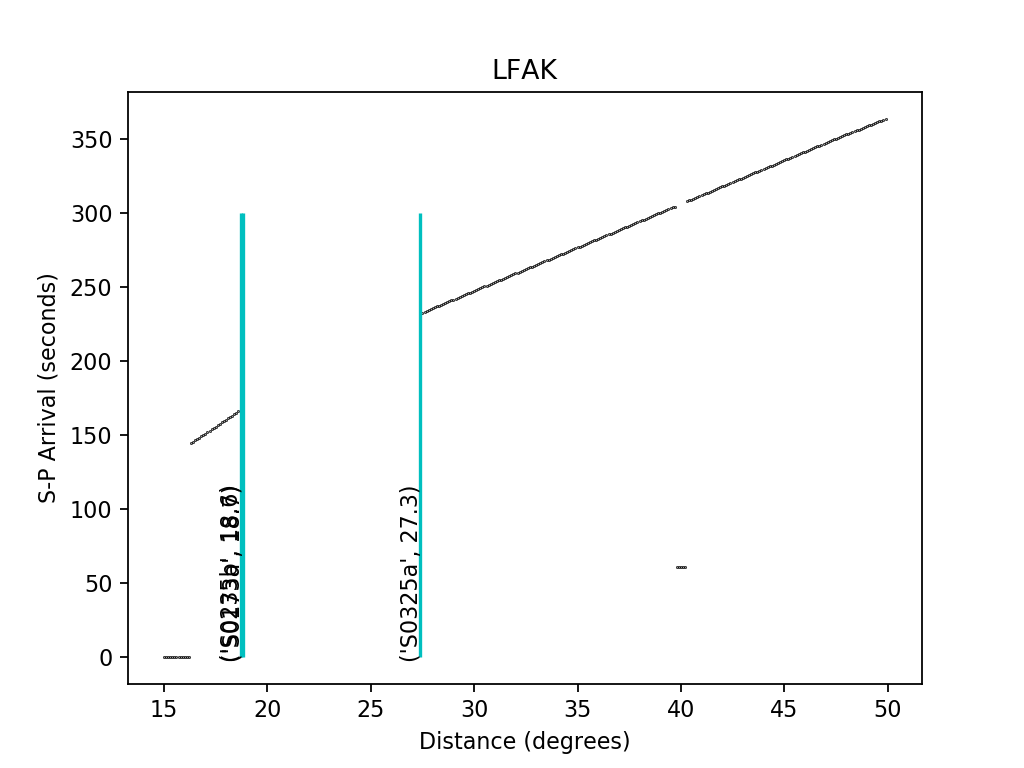

diff index values: 38 167.607234889
distance of S0173a: 18.8
diff index values: 37 166.671308837
distance of S0235b: 18.7
diff index values: 39 232.005657161
distance of S0325a: 27.4


<IPython.core.display.Javascript object>


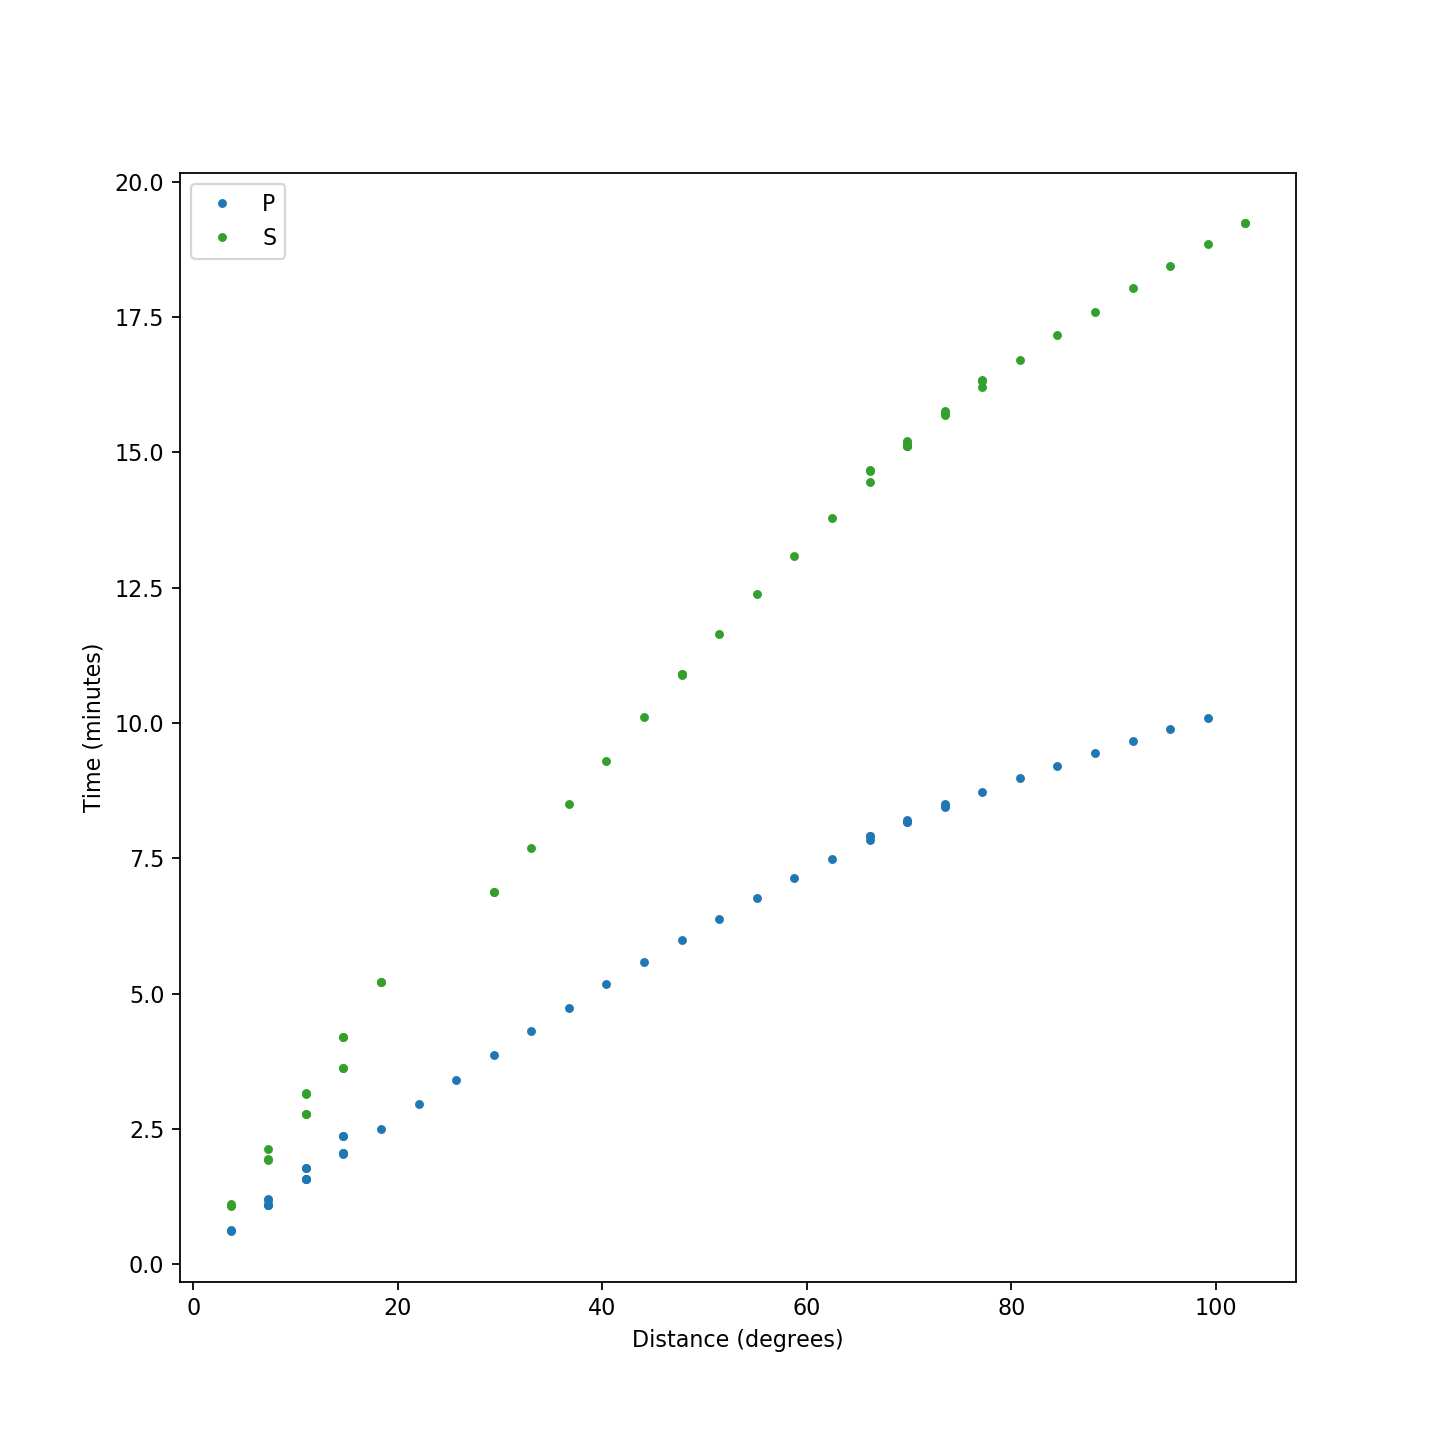

In [26]:
%matplotlib notebook
diff, dist_ls = distplot("LFAK", 35)
fig, ax = plt.subplots(figsize=(9, 9))
ax = plot_travel_times(source_depth=35, phase_list=["P", "S"], model='LFAK',
                       ax=ax, fig=fig)

<IPython.core.display.Javascript object>


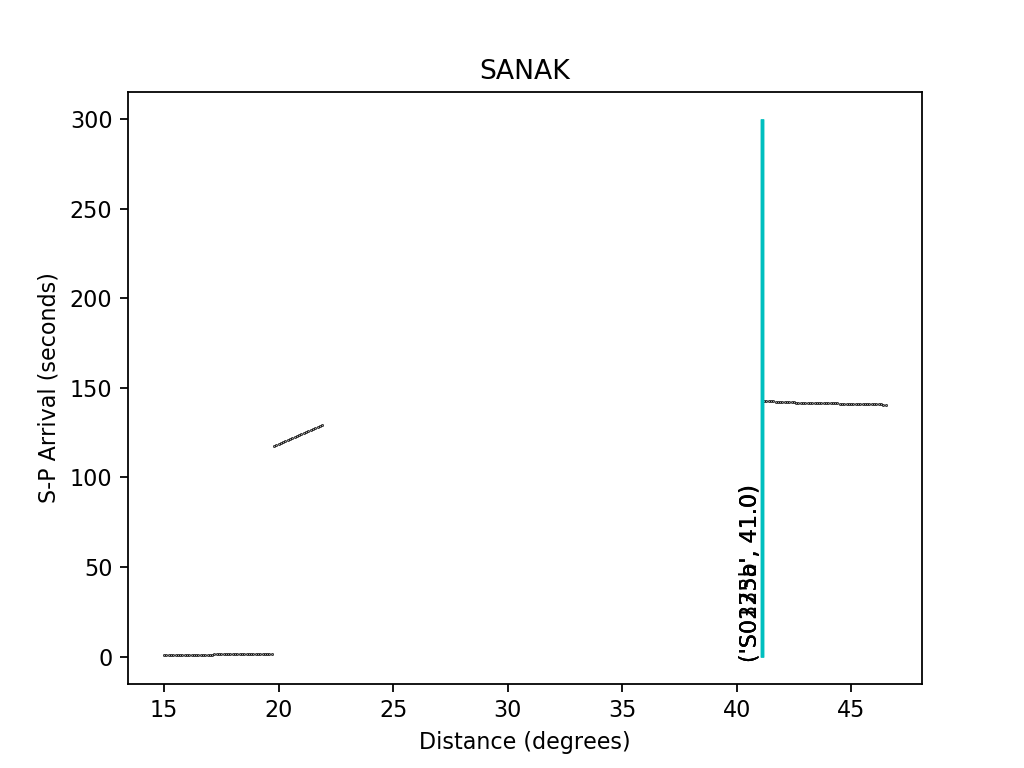

diff index values: 70 142.631508495
distance of S0173a: 41.1
diff index values: 70 142.631508495
distance of S0235b: 41.1
diff index values: 70 142.631508495
distance of S0325a: 41.1


<IPython.core.display.Javascript object>


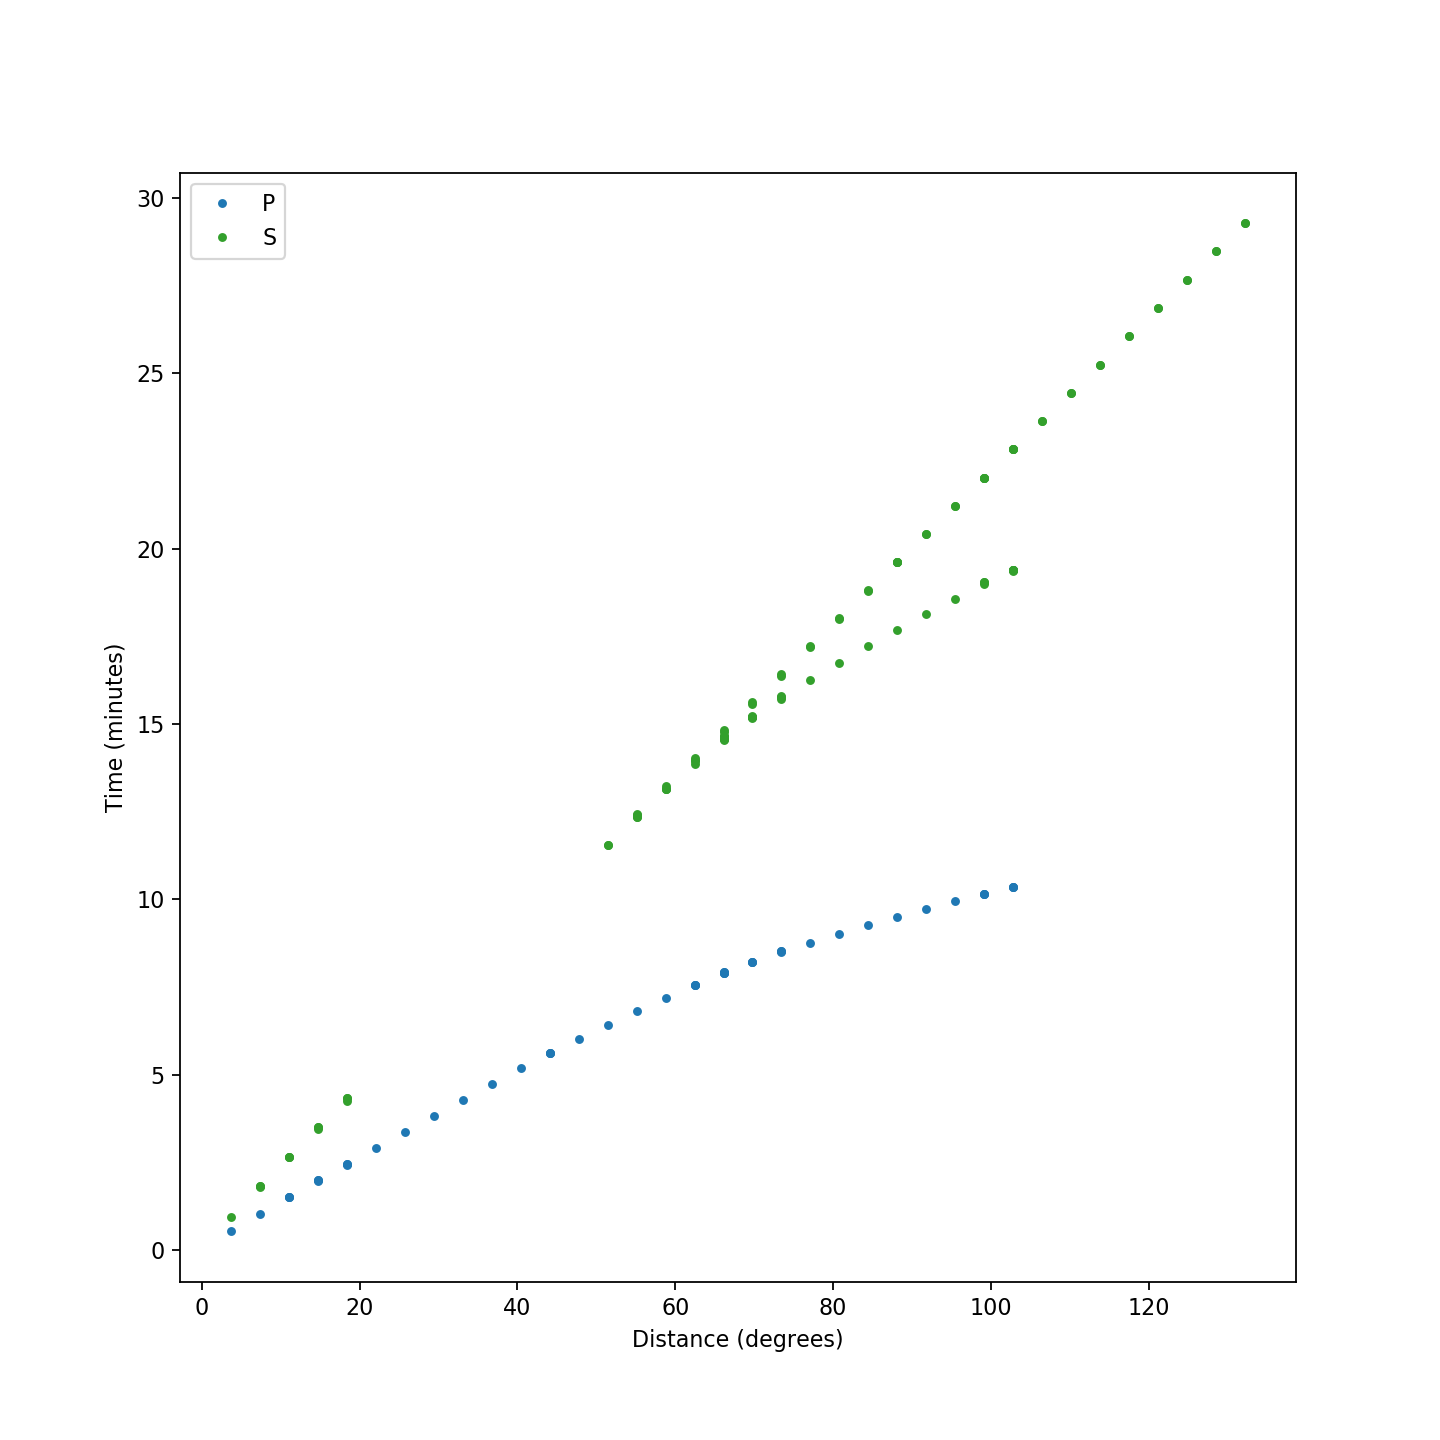

In [27]:
%matplotlib notebook
diff, dist_ls = distplot("SANAK", 35)
fig, ax = plt.subplots(figsize=(9, 9))
ax = plot_travel_times(source_depth=35, phase_list=["P", "S"], model='SANAK',
                       ax=ax, fig=fig)